<a href="https://colab.research.google.com/github/mubarakdalvi/myprojects/blob/main/Creditcard_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing faker library

In [2298]:
pip install faker

importing important library for random data generation, data manipulation and visualization

In [2299]:
from faker import Faker
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime,timedelta
from statsmodels.tsa.seasonal import seasonal_decompose

creating object of of faker

In [2300]:
fake = Faker()

main code start from here

In [2301]:

transaction = []
transaction_dates = []

for _ in range(1000):
    cardholder = fake.name()
    card_number = fake.credit_card_number(card_type=None)
    merchant_company = random.choice(['Flipkart','Amazon','JioMart','BigBAsket','D-MArt'])
    transaction_amount = round(random.uniform(10.0,10000.0),2)
    transaction_status = random.choice(['Approved','Declined','Pending','failed'])
    transaction_date = fake.date_time_between('-312d', end_date='now')

    transaction.append({
        'card holder' : cardholder,
        'card number' : card_number,
        'transaction_amount' : transaction_amount,
        'merchant_company' : merchant_company,
        'transaction_status' : transaction_status
                        })

    transaction_dates.append(transaction_date)

converting data to data frame

In [2302]:
df = pd.DataFrame(transaction)

adding transaction dates to table

In [2303]:
df['transaction_dates'] = transaction_dates

to select from 0 to last column as aply

In [2304]:
df.loc[:,'transaction_dates'][0], df.loc[:,'transaction_dates'][len(df)-1]

(Timestamp('2023-08-23 05:04:58.935072'),
 Timestamp('2023-08-25 15:42:55.678216'))

wtting all 10000 rows data just for glimps

In [2305]:
'''pd.set_option('display.max_rows', None)'''

"pd.set_option('display.max_rows', None)"

getting 10000 data in dataframe

In [2306]:
df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates
0,Sierra Williams,379763827611365,6523.61,D-MArt,failed,2023-08-23 05:04:58.935072
1,Aaron Bowman,060490271768,392.20,BigBAsket,Pending,2023-11-02 00:11:37.242272
2,Steven Goodman,213172076119247,3296.74,Amazon,failed,2023-05-04 20:19:32.819661
3,Rose Baker,5215145463130008,7493.66,Amazon,failed,2023-04-29 07:27:38.353889
4,Jonathan Wallace,060473281511,7351.44,D-MArt,Pending,2023-10-15 23:06:35.702312


conversion to csv file

In [2307]:
df['transaction_status'].nunique()

4

In [2308]:
df.to_csv('df.csv',index=False)

reading csv file in data frame

In [2309]:
dt_str = lambda x : pd.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f')
df = pd.read_csv('df.csv',parse_dates=['transaction_dates'],date_parser= dt_str)

<ipython-input-2309-5b0ccd8fb189>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dt_str = lambda x : pd.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f')


reading data frame file, getting top 5 values

In [2310]:
df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates
0,Sierra Williams,379763827611365,6523.61,D-MArt,failed,2023-08-23 05:04:58.935072
1,Aaron Bowman,60490271768,392.20,BigBAsket,Pending,2023-11-02 00:11:37.242272
2,Steven Goodman,213172076119247,3296.74,Amazon,failed,2023-05-04 20:19:32.819661
3,Rose Baker,5215145463130008,7493.66,Amazon,failed,2023-04-29 07:27:38.353889
4,Jonathan Wallace,60473281511,7351.44,D-MArt,Pending,2023-10-15 23:06:35.702312


getting mean ,count abd other factors

In [2311]:
df.loc[0,'transaction_dates']

Timestamp('2023-08-23 05:04:58.935072')

In [2312]:
df['transaction_dates'] = pd.to_datetime(df['transaction_dates'],format='%Y-%m-%d %H:%M:%S.%f')

In [2313]:
df['transaction_dates'].head()

0   2023-08-23 05:04:58.935072
1   2023-11-02 00:11:37.242272
2   2023-05-04 20:19:32.819661
3   2023-04-29 07:27:38.353889
4   2023-10-15 23:06:35.702312
Name: transaction_dates, dtype: datetime64[ns]

In [2314]:
df.describe()

,card number,transaction_amount
count,1.000000e+03,1000.000000
mean,4.032932e+17,4978.687200
std,1.286711e+18,2908.407069
min,6.043400e+10,22.380000
25%,3.847278e+13,2487.032500
50%,3.507911e+15,5048.685000
75%,4.610500e+15,7632.975000
max,4.993850e+18,9979.560000


getting info for of table to check if there is any null value missing data

In [2315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   card holder         1000 non-null   object        
 1   card number         1000 non-null   int64         
 2   transaction_amount  1000 non-null   float64       
 3   merchant_company    1000 non-null   object        
 4   transaction_status  1000 non-null   object        
 5   transaction_dates   1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 47.0+ KB


cheiking correlation for the table calumn values

In [2316]:
df.corr()

<ipython-input-2316-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,card number,transaction_amount
card number,1.000000,0.019081
transaction_amount,0.019081,1.000000


chechink how many number of unique values are in transaction_dates

In [2317]:
df['transaction_dates'].nunique()

1000

as this column can be type cated to number vulues for better understanding

In [2318]:
df['transaction_status'].unique()

array(['failed', 'Pending', 'Declined', 'Approved'], dtype=object)

cheking number of unique values

checking number of unique values in transaction_amount

In [2319]:
df['transaction_amount'].nunique()

999

dropping duplicte values from data frame

In [2320]:
df = df.drop_duplicates(subset='transaction_amount')

In [2321]:
df['transaction_amount'].nunique()

999

In [2322]:
count = df['card holder'].value_counts()

In [2323]:
count_1 = count[count >= 2].index

In [2324]:
duplicate = df[df['card holder'].isin(count_1)]

In [2325]:
duplicate

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates
103,Karen Rios,4645546168345184,7127.87,Amazon,Pending,2023-07-03 08:06:33.748921
162,Brian Williams,2546399467828169,5685.64,Amazon,Approved,2023-07-29 22:05:53.467140
216,Joshua Jordan,4043369238507944616,6067.13,D-MArt,failed,2023-06-19 00:39:36.877197
233,John Esparza,371212057259824,1360.95,D-MArt,Pending,2023-11-01 19:32:30.749347
240,Joshua Jordan,4412037104240,30.22,Amazon,Approved,2023-06-30 14:57:48.965667
409,Kimberly Johnson,6011998849092795,704.27,JioMart,Declined,2023-10-04 03:42:19.061040
523,Michael Carter,4145027729531,3111.36,D-MArt,Pending,2023-08-23 13:29:39.416111
537,John Esparza,6552286615055799,5650.33,JioMart,failed,2023-10-29 17:35:59.319965
631,Jessica Martinez,375809682806865,4906.47,Flipkart,Approved,2023-09-06 20:18:16.992280
668,Ryan Miller,3504691600918206,8494.57,BigBAsket,Pending,2023-03-02 02:02:16.156219


In [2326]:
df.columns

Index(['card holder', 'card number', 'transaction_amount', 'merchant_company',
       'transaction_status', 'transaction_dates'],
      dtype='object')

checking if any duplicate in data frame

In [2327]:
duplicate = df.duplicated()

if duplicate.any():
  print('There Is Duplicate Value In Data Frame')
else:
  print('No Duplicate Values Available In Data Frame')

No Duplicate Values Available In Data Frame


all transactions have different time

In [2328]:
df['transaction_dates'].nunique()

999

In [2329]:
df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates
0,Sierra Williams,379763827611365,6523.61,D-MArt,failed,2023-08-23 05:04:58.935072
1,Aaron Bowman,60490271768,392.20,BigBAsket,Pending,2023-11-02 00:11:37.242272
2,Steven Goodman,213172076119247,3296.74,Amazon,failed,2023-05-04 20:19:32.819661
3,Rose Baker,5215145463130008,7493.66,Amazon,failed,2023-04-29 07:27:38.353889
4,Jonathan Wallace,60473281511,7351.44,D-MArt,Pending,2023-10-15 23:06:35.702312


In [2330]:
df['merchant_company'].nunique()

5

In [2331]:
def status(col):
  if col == 'Approved':
    return 0
  elif col == 'Decline':
    return 1
  elif col == 'Pending':
    return 2
  else:
    return 3
df['transaction_status'] = df['transaction_status'].apply(status)

In [2332]:
df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates
0,Sierra Williams,379763827611365,6523.61,D-MArt,3,2023-08-23 05:04:58.935072
1,Aaron Bowman,60490271768,392.20,BigBAsket,2,2023-11-02 00:11:37.242272
2,Steven Goodman,213172076119247,3296.74,Amazon,3,2023-05-04 20:19:32.819661
3,Rose Baker,5215145463130008,7493.66,Amazon,3,2023-04-29 07:27:38.353889
4,Jonathan Wallace,60473281511,7351.44,D-MArt,2,2023-10-15 23:06:35.702312


In [2333]:
merchant = df['merchant_company'].unique()

fisrt method

In [2334]:
'''
def mer_com(col):
  if col == 'D-MArt':
    return 0
  elif col == 'JioMart':
    return 1
  elif col == 'Amazon':
    return 2
  elif col == 'BigBAsket':
    return 3
  elif col == 'Flipkart':
    return 4
df['merchant_company'] = df['merchant_company'].apply(mer_com)
'''

"\ndef mer_com(col):\n  if col == 'D-MArt':\n    return 0\n  elif col == 'JioMart':\n    return 1\n  elif col == 'Amazon':\n    return 2\n  elif col == 'BigBAsket':\n    return 3\n  elif col == 'Flipkart':\n    return 4\ndf['merchant_company'] = df['merchant_company'].apply(mer_com)\n"

another method is replace

In [2335]:
df.replace(['D-MArt', 'BigBAsket', 'Amazon', 'JioMart', 'Flipkart'],[0,1,2,3,4],inplace=True)

In [2336]:
df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates
0,Sierra Williams,379763827611365,6523.61,0,3,2023-08-23 05:04:58.935072
1,Aaron Bowman,60490271768,392.20,1,2,2023-11-02 00:11:37.242272
2,Steven Goodman,213172076119247,3296.74,2,3,2023-05-04 20:19:32.819661
3,Rose Baker,5215145463130008,7493.66,2,3,2023-04-29 07:27:38.353889
4,Jonathan Wallace,60473281511,7351.44,0,2,2023-10-15 23:06:35.702312


In [2337]:
df['card holder'].nunique()

988

In [2338]:
df.corr()

<ipython-input-2338-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,card number,transaction_amount,merchant_company,transaction_status
card number,1.000000,0.018631,0.031035,-0.018630
transaction_amount,0.018631,1.000000,-0.029330,-0.000530
merchant_company,0.031035,-0.029330,1.000000,-0.003404
transaction_status,-0.018630,-0.000530,-0.003404,1.000000


In [2339]:
df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates
0,Sierra Williams,379763827611365,6523.61,0,3,2023-08-23 05:04:58.935072
1,Aaron Bowman,60490271768,392.20,1,2,2023-11-02 00:11:37.242272
2,Steven Goodman,213172076119247,3296.74,2,3,2023-05-04 20:19:32.819661
3,Rose Baker,5215145463130008,7493.66,2,3,2023-04-29 07:27:38.353889
4,Jonathan Wallace,60473281511,7351.44,0,2,2023-10-15 23:06:35.702312


In [2340]:
df.corr()

<ipython-input-2340-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,card number,transaction_amount,merchant_company,transaction_status
card number,1.000000,0.018631,0.031035,-0.018630
transaction_amount,0.018631,1.000000,-0.029330,-0.000530
merchant_company,0.031035,-0.029330,1.000000,-0.003404
transaction_status,-0.018630,-0.000530,-0.003404,1.000000


In [2341]:
df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates
0,Sierra Williams,379763827611365,6523.61,0,3,2023-08-23 05:04:58.935072
1,Aaron Bowman,60490271768,392.20,1,2,2023-11-02 00:11:37.242272
2,Steven Goodman,213172076119247,3296.74,2,3,2023-05-04 20:19:32.819661
3,Rose Baker,5215145463130008,7493.66,2,3,2023-04-29 07:27:38.353889
4,Jonathan Wallace,60473281511,7351.44,0,2,2023-10-15 23:06:35.702312


In [2342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   card holder         999 non-null    object        
 1   card number         999 non-null    int64         
 2   transaction_amount  999 non-null    float64       
 3   merchant_company    999 non-null    int64         
 4   transaction_status  999 non-null    int64         
 5   transaction_dates   999 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 54.6+ KB


In [2343]:
df.describe()

,card number,transaction_amount,merchant_company,transaction_status
count,9.990000e+02,999.000000,999.000000,999.000000
mean,4.036922e+17,4983.122042,2.021021,2.000000
std,1.287293e+18,2906.478957,1.437599,1.228421
min,6.043400e+10,22.380000,0.000000,0.000000
25%,3.844724e+13,2487.400000,1.000000,0.000000
50%,3.507741e+15,5052.460000,2.000000,3.000000
75%,4.602437e+15,7634.430000,3.000000,3.000000
max,4.993850e+18,9979.560000,4.000000,3.000000


In [2344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   card holder         999 non-null    object        
 1   card number         999 non-null    int64         
 2   transaction_amount  999 non-null    float64       
 3   merchant_company    999 non-null    int64         
 4   transaction_status  999 non-null    int64         
 5   transaction_dates   999 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 54.6+ KB


## **EDA**     Exploratory Data Analysis

In [2345]:
def drop_rows(df, col):
  if col in [1,2,3]:
    df.drop(df[df['transaction_status'].isin([1,2,3])].index,inplace=True)
    return df

In [2346]:
df = drop_rows(df, 1)

In [2347]:
df.reset_index(drop=True,inplace=True)

In [2348]:
df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates
0,Brian Coleman,3578693787486586,7980.07,4,0,2023-05-05 12:38:12.753574
1,James Hill,3566592122123744,8008.99,3,0,2023-11-28 23:08:49.842237
2,Stacy Bryan,4632438283134799,7451.17,4,0,2023-09-10 05:07:36.512957
3,Nicole Hopkins,3507740999320693,6190.10,1,0,2023-06-25 01:16:59.462183
4,Veronica Ross,2253567446361055,9444.14,1,0,2023-06-04 08:37:24.477122


In [2349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   card holder         251 non-null    object        
 1   card number         251 non-null    int64         
 2   transaction_amount  251 non-null    float64       
 3   merchant_company    251 non-null    int64         
 4   transaction_status  251 non-null    int64         
 5   transaction_dates   251 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 11.9+ KB


can use to join data frame wihout any relation

In [2350]:
# to join column withour relationship we have to use join column
'''df.join(new_df,how='inner')'''

"df.join(new_df,how='inner')"

In [2351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   card holder         251 non-null    object        
 1   card number         251 non-null    int64         
 2   transaction_amount  251 non-null    float64       
 3   merchant_company    251 non-null    int64         
 4   transaction_status  251 non-null    int64         
 5   transaction_dates   251 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 11.9+ KB


In [2352]:
df.loc[0,'transaction_dates'].day_name()

'Friday'

In [2353]:
df['transaction_status'].unique()

array([0])

In [2354]:
df['transaction_dates'].max()

Timestamp('2023-12-18 09:07:54.980213')

In [2355]:
df['transaction_dates'].max() - df['transaction_dates'].min()

Timedelta('309 days 17:27:16.813125')

In [2356]:
df['transaction_amount'].max()

9915.88

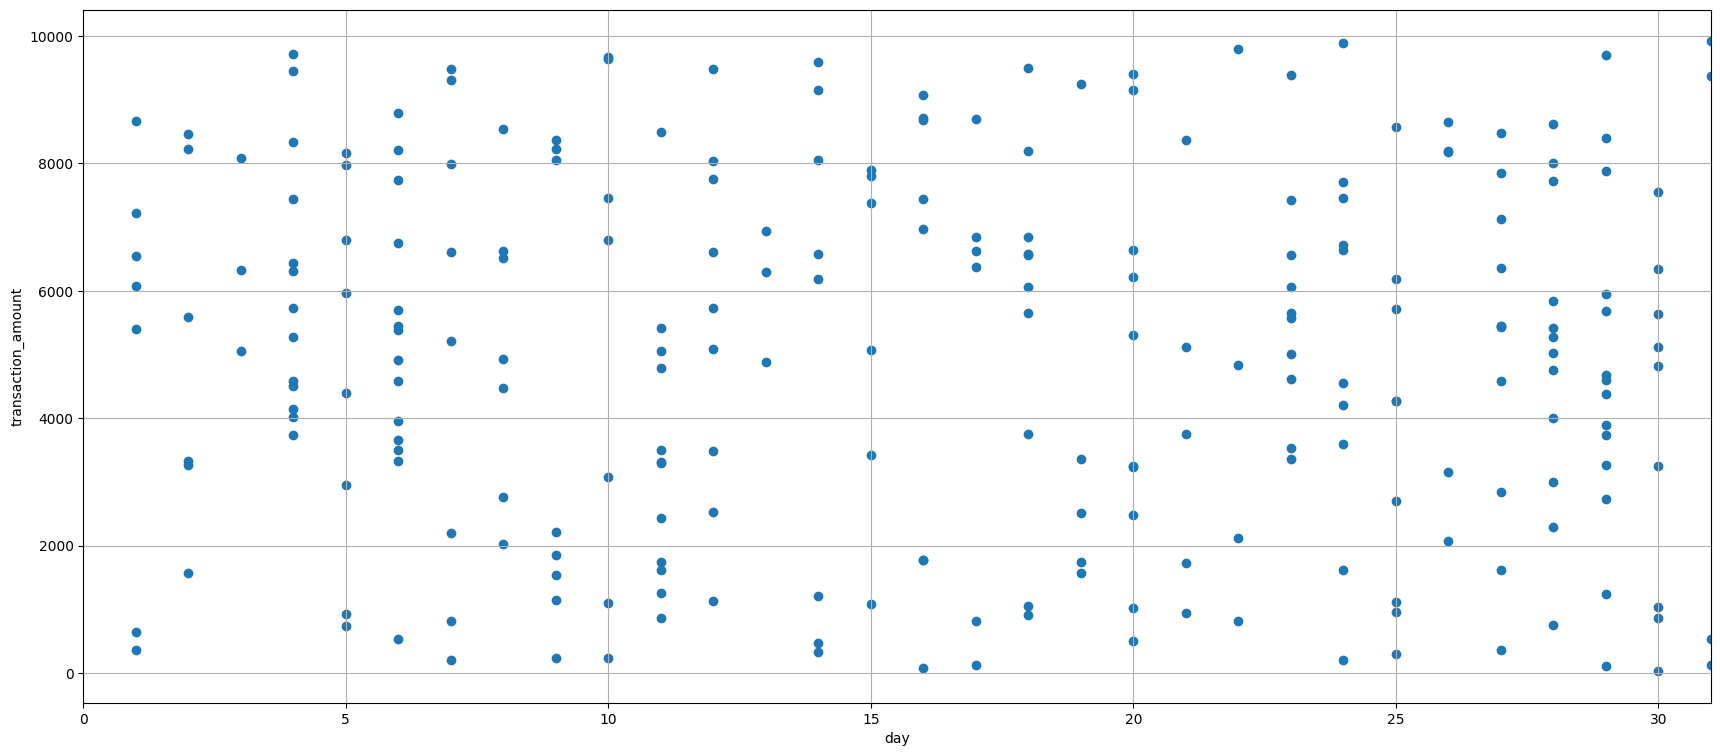

In [2357]:
plt.figure(figsize=(21,9))
plt.scatter(df['transaction_dates'].dt.day, df['transaction_amount'], marker='o', linestyle='-')
plt.xlim(0,31)
plt.xlabel('day')
plt.ylabel('transaction_amount')
plt.grid(True)
plt.show()

In [2358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   card holder         251 non-null    object        
 1   card number         251 non-null    int64         
 2   transaction_amount  251 non-null    float64       
 3   merchant_company    251 non-null    int64         
 4   transaction_status  251 non-null    int64         
 5   transaction_dates   251 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 11.9+ KB


In [2359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   card holder         251 non-null    object        
 1   card number         251 non-null    int64         
 2   transaction_amount  251 non-null    float64       
 3   merchant_company    251 non-null    int64         
 4   transaction_status  251 non-null    int64         
 5   transaction_dates   251 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 11.9+ KB


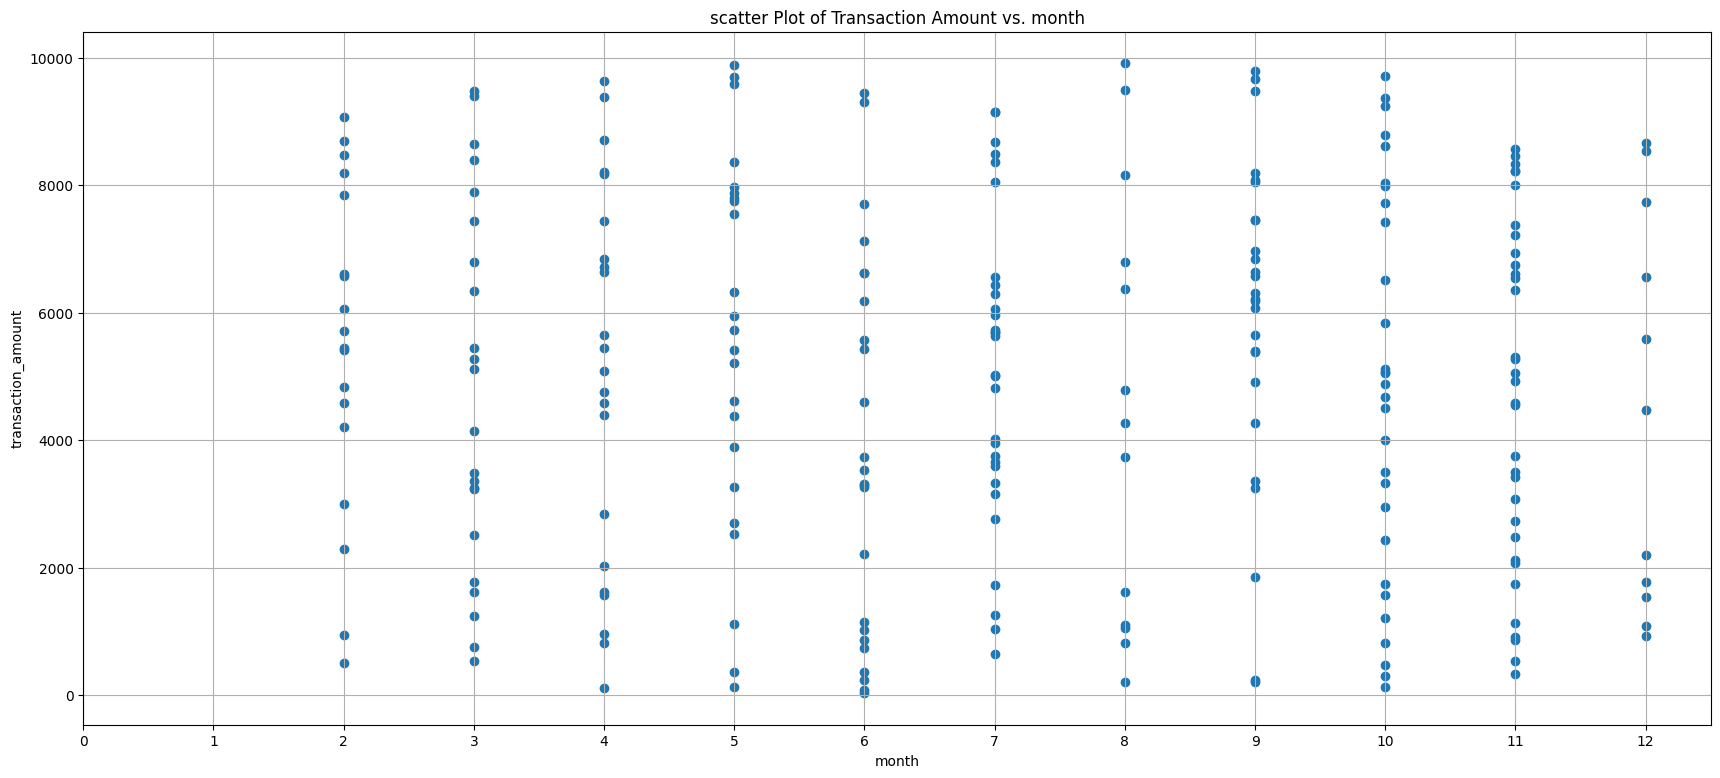

In [2360]:
plt.figure(figsize=(21,9))
plt.scatter(df['transaction_dates'].dt.month,df['transaction_amount'],marker='o', linestyle='-')
plt.title('scatter Plot of Transaction Amount vs. month')
plt.xlabel('month')
plt.xticks(range(0, 13))
plt.ylabel('transaction_amount')
plt.grid(True)
plt.show()

this is how we can reset index if we have setted index and we had foggeten then we can do this

In [2361]:
df['transaction_amount'].describe()

count     251.000000
mean     4978.638725
std      2828.077251
min        30.220000
25%      2716.120000
50%      5120.500000
75%      7432.105000
max      9915.880000
Name: transaction_amount, dtype: float64

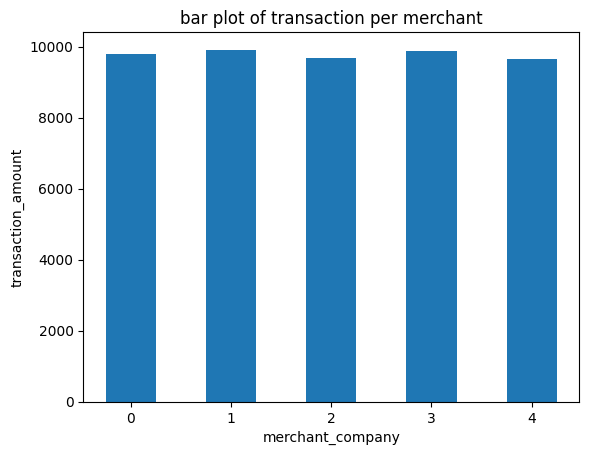

In [2362]:
plt.bar(df['merchant_company'],df['transaction_amount'],align='center',width=0.5)
plt.xlabel('merchant_company')
plt.ylabel('transaction_amount')
plt.title('bar plot of transaction per merchant')
plt.show()

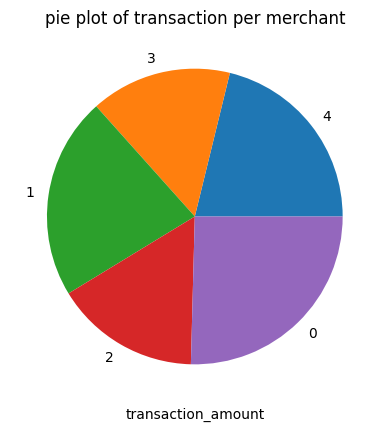

In [2363]:
plt.pie(df.groupby('merchant_company')['transaction_amount'].sum(),labels=df['merchant_company'].unique())
plt.xlabel('transaction_amount')
plt.title('pie plot of transaction per merchant')
plt.show()

In [2364]:
def modify_cardholder(col):
  try:
    col = int(col)
    return 0 if col < 2 else col
  except (ValueError,TypeError):
    return col

In [2365]:
df['card holder'] = df['card holder'].apply(modify_cardholder)

In [2366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   card holder         251 non-null    object        
 1   card number         251 non-null    int64         
 2   transaction_amount  251 non-null    float64       
 3   merchant_company    251 non-null    int64         
 4   transaction_status  251 non-null    int64         
 5   transaction_dates   251 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 11.9+ KB


In [2367]:
df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates
0,Brian Coleman,3578693787486586,7980.07,4,0,2023-05-05 12:38:12.753574
1,James Hill,3566592122123744,8008.99,3,0,2023-11-28 23:08:49.842237
2,Stacy Bryan,4632438283134799,7451.17,4,0,2023-09-10 05:07:36.512957
3,Nicole Hopkins,3507740999320693,6190.10,1,0,2023-06-25 01:16:59.462183
4,Veronica Ross,2253567446361055,9444.14,1,0,2023-06-04 08:37:24.477122


In [2368]:
def ocasional_Spenders(col):
  if 100 <= col <= 4999:
    return 'os'

In [2369]:
df['occasional_spender'] =  df['transaction_amount'].apply(ocasional_Spenders)

In [2370]:
sorted1_df = df.sort_values(by='occasional_spender',ascending=False)

In [2371]:
sorted1_df['occasional_spender'].value_counts()

os    116
Name: occasional_spender, dtype: int64

In [2372]:
sorted1_df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates,occasional_spender
5,Lynn Rogers,374038044401311,4592.36,2,0,2023-06-29 18:49:58.425974,os
156,Morgan Nguyen,6532273954377617,1046.91,0,0,2023-08-18 02:04:47.043606,os
175,Matthew Reed,4098807591136,3149.62,3,0,2023-07-26 01:56:29.777961,os
174,Kristine Waters,4917515973147651340,3949.59,2,0,2023-07-06 06:19:29.843748,os
171,Cindy Terry,213186764995304,2757.37,2,0,2023-07-08 18:30:06.870121,os


In [2373]:
def regular_spender(col):
  if 5000 <= col <= 6999:
    return 'rs'

In [2374]:
df['regular_spender'] = df['transaction_amount'].apply(regular_spender)

In [2375]:
sorted2_df = df.sort_values(by='occasional_spender',ascending=False)

In [2376]:
sorted2_df

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates,occasional_spender,regular_spender
5,Lynn Rogers,374038044401311,4592.36,2,0,2023-06-29 18:49:58.425974,os,None
156,Morgan Nguyen,6532273954377617,1046.91,0,0,2023-08-18 02:04:47.043606,os,None
175,Matthew Reed,4098807591136,3149.62,3,0,2023-07-26 01:56:29.777961,os,None
174,Kristine Waters,4917515973147651340,3949.59,2,0,2023-07-06 06:19:29.843748,os,None
171,Cindy Terry,213186764995304,2757.37,2,0,2023-07-08 18:30:06.870121,os,None
...,...,...,...,...,...,...,...,...
238,Shannon Hines MD,3542963865394447,9915.88,1,0,2023-08-31 20:42:06.727434,None,None
240,Leah Daniels,2548079087986013,5443.66,4,0,2023-02-27 13:00:21.655799,None,rs
241,Glenn Williams,30383633764448,5213.84,4,0,2023-05-07 09:33:55.319436,None,rs
242,Amy Castillo,4008814597244167,5652.81,1,0,2023-04-23 14:11:01.776749,None,rs


In [2377]:
def high_spender(col):
  if col >= 7000:
    return 'hs'

In [2378]:
df['high_spender'] = df['transaction_amount'].apply(high_spender)

In [2379]:
sorted3_df = df.sort_values(by='high_spender',ascending=False)

In [2380]:
sorted3_df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates,occasional_spender,regular_spender,high_spender
0,Brian Coleman,3578693787486586,7980.07,4,0,2023-05-05 12:38:12.753574,None,None,hs
186,Derrick Pineda,30312106536454,8078.30,2,0,2023-09-03 16:52:38.269151,None,None,hs
132,Rachel Jones,6011647566722213,8650.44,0,0,2023-03-26 12:32:18.415879,None,None,hs
134,Elizabeth Valentine,4384943904168563242,8208.63,3,0,2023-04-06 23:29:08.973765,None,None,hs
135,Andrew Rice,4437322990813,7803.95,1,0,2023-05-15 21:37:40.905531,None,None,hs


In [2381]:
df['spending'] = df['occasional_spender'].astype(str).fillna('') + df['regular_spender'].astype(str).fillna('') + df['high_spender'].astype(str).fillna('')

In [2382]:
df.tail()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates,occasional_spender,regular_spender,high_spender,spending
246,Kelli Savage,4421384013797,129.23,0,0,2023-05-17 12:13:07.747281,os,None,None,osNoneNone
247,Pamela Contreras,4405482400386,115.43,4,0,2023-04-29 11:33:03.347719,os,None,None,osNoneNone
248,Vanessa Gallegos,502020442633,1570.55,2,0,2023-10-02 17:24:57.053466,os,None,None,osNoneNone
249,Bonnie Mendez,3521120195551593,3748.09,2,0,2023-07-18 11:44:50.896274,os,None,None,osNoneNone
250,Margaret Olson,4653731252346046,4264.43,0,0,2023-08-25 15:42:55.678216,os,None,None,osNoneNone


In [2383]:
def noni(col):
  if col == 'NoneNonehs':
    return 0
  elif col == 'NonersNone':
    return 1
  elif col == 'osNoneNone':
    return 2
  else:
    return col
df['spending'] = df['spending'].apply(noni)

In [2384]:
df['card holder'].nunique()

251

In [2385]:
frequency = df['card holder'].value_counts()

In [2386]:
f = frequency[frequency >= 2].index

In [2387]:
s = df[df['card holder'].isin(f)]

In [2388]:
df.drop(['occasional_spender','regular_spender','high_spender'],axis=1,inplace=True)

on frequently she purchased things

In [2389]:
df.head()

,card holder,card number,transaction_amount,merchant_company,transaction_status,transaction_dates,spending
0,Brian Coleman,3578693787486586,7980.07,4,0,2023-05-05 12:38:12.753574,0
1,James Hill,3566592122123744,8008.99,3,0,2023-11-28 23:08:49.842237,0
2,Stacy Bryan,4632438283134799,7451.17,4,0,2023-09-10 05:07:36.512957,0
3,Nicole Hopkins,3507740999320693,6190.10,1,0,2023-06-25 01:16:59.462183,1
4,Veronica Ross,2253567446361055,9444.14,1,0,2023-06-04 08:37:24.477122,0


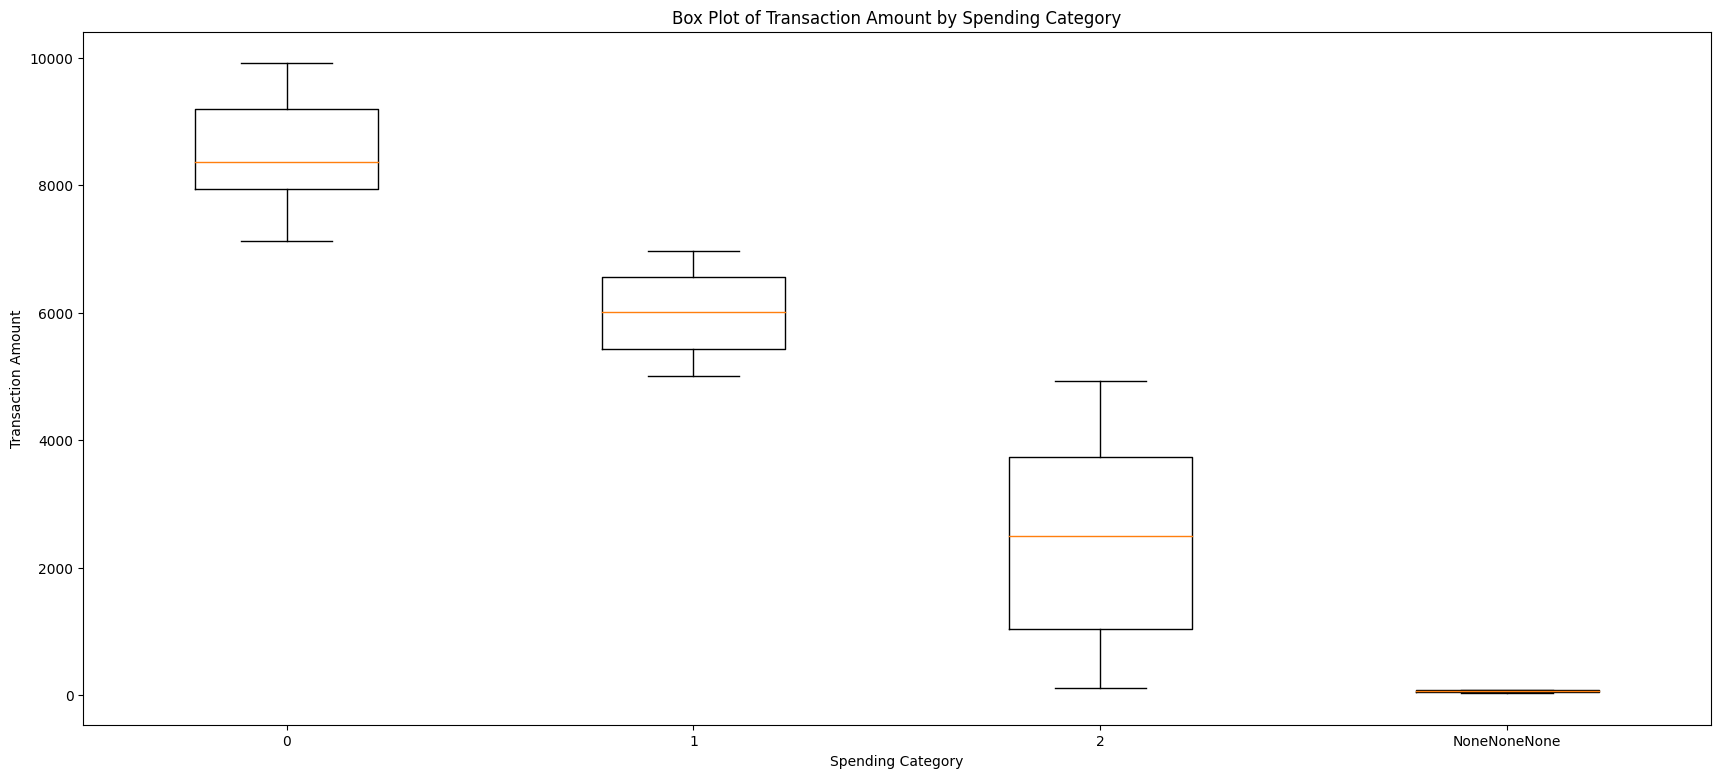

In [2390]:
plt.figure(figsize=(21, 9))
plt.boxplot([df[df['spending'] == category]['transaction_amount'] for category in df['spending'].unique()],
            labels=df['spending'].unique())
plt.title('Box Plot of Transaction Amount by Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Transaction Amount')
plt.show()

In [2391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   card holder         251 non-null    object        
 1   card number         251 non-null    int64         
 2   transaction_amount  251 non-null    float64       
 3   merchant_company    251 non-null    int64         
 4   transaction_status  251 non-null    int64         
 5   transaction_dates   251 non-null    datetime64[ns]
 6   spending            251 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 13.9+ KB


In [2392]:
df.corr()

<ipython-input-2392-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,card number,transaction_amount,merchant_company,transaction_status
card number,1.000000,-0.034281,0.041483,NaN
transaction_amount,-0.034281,1.000000,0.030506,NaN
merchant_company,0.041483,0.030506,1.000000,NaN
transaction_status,NaN,NaN,NaN,NaN


In [2393]:
df['transaction_time'] = df['transaction_dates'].dt.hour * 3600 + df['transaction_dates'].dt.minute * 60 + df['transaction_dates'].dt.second

In [2394]:
time = df['transaction_dates'].dt.strftime('%H:%M:%S.%f')

In [2395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   card holder         251 non-null    object        
 1   card number         251 non-null    int64         
 2   transaction_amount  251 non-null    float64       
 3   merchant_company    251 non-null    int64         
 4   transaction_status  251 non-null    int64         
 5   transaction_dates   251 non-null    datetime64[ns]
 6   spending            251 non-null    object        
 7   transaction_time    251 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 15.8+ KB


In [2398]:
df.corr()

<ipython-input-2398-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,card number,transaction_amount,merchant_company,transaction_status,transaction_time
card number,1.000000,-0.034281,0.041483,NaN,0.036561
transaction_amount,-0.034281,1.000000,0.030506,NaN,0.068044
merchant_company,0.041483,0.030506,1.000000,NaN,0.011863
transaction_status,NaN,NaN,NaN,NaN,NaN
transaction_time,0.036561,0.068044,0.011863,NaN,1.000000


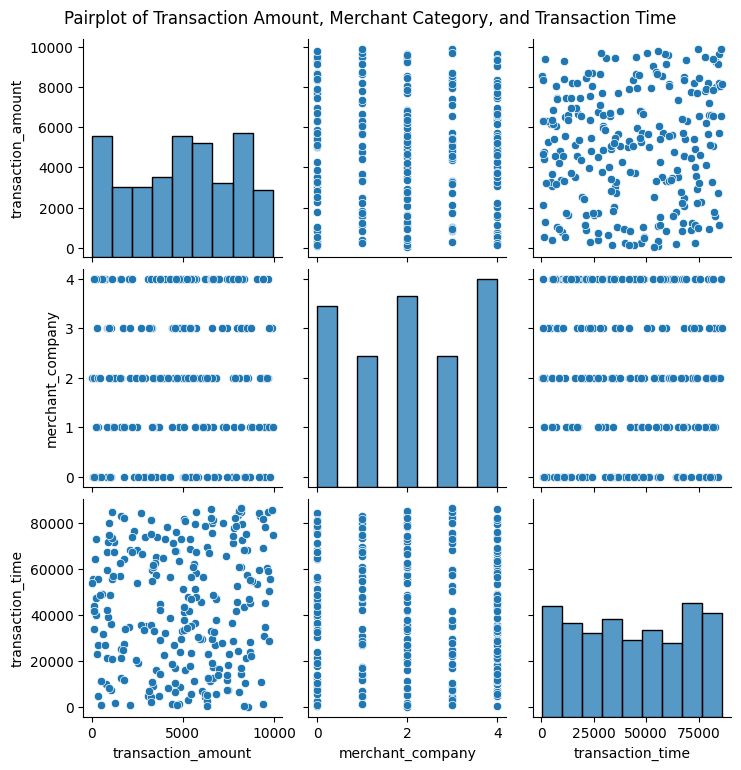

In [2397]:
sns.pairplot(df[['transaction_amount', 'merchant_company', 'transaction_time']])
plt.suptitle('Pairplot of Transaction Amount, Merchant Category, and Transaction Time', y=1.02)
plt.show()

# on summerizing the data we have